In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

##**Get the Mnist data and pre preocess it**

In [2]:
from re import X
(X_trainb,y_trainb),(X_testb,y_testb) = mnist.load_data()
 # /** 
 #    mnist is a data set of 60,000 grayscale images with 28*28 size of the 10 digits 
 #    along with a test set of 10,000 images 
 #    In industry standarts we use capital letter for x and small letter for y 
 # **/

X_trainb.shape,X_testb.shape,y_trainb.shape,y_testb.shape


11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
# /** 
#    lets plot the images to visuvalize the data 
#    i am writing a function to dislay multiple  images  at a time 
# **/
def plot_input_img(i):
    plt.imshow(X_trainb[i],cmap=plt.cm.binary)
    plt.title(y_trainb[i])
   # plt.axes('off')
    plt.show()

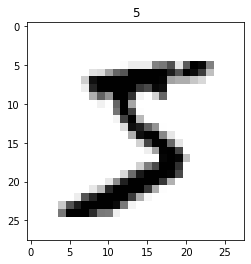

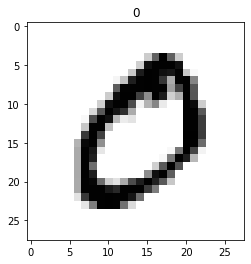

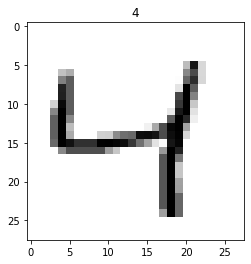

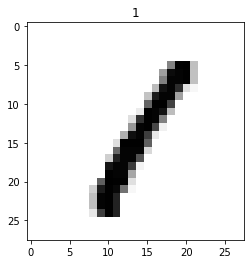

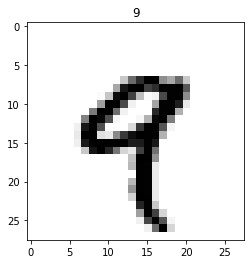

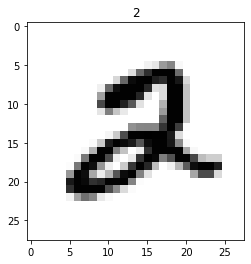

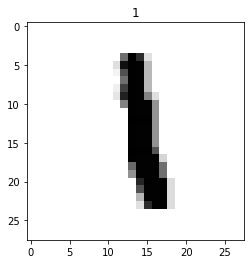

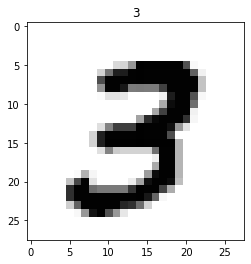

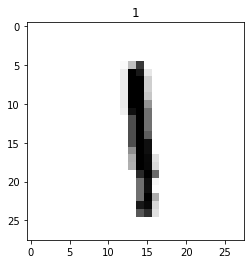

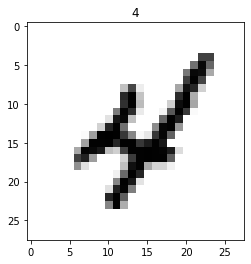

In [4]:
# /** 
#    lets print first 10 images 
# **/
for i in range(10):
     plot_input_img(i)


In [5]:
#checking the values of each pixel before normalization
print(X_trainb[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

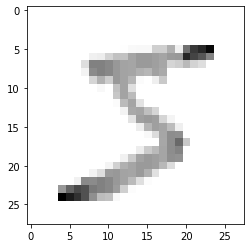

In [6]:
# Pre Process the images
# as images are in fray level(1 channel ==>0 to 255), not colored

#Normalizing the images to o/1

X_train = tf.keras.utils.normalize(X_trainb,axis=1)
X_test = tf.keras.utils.normalize(X_testb,axis=1)
plt.imshow(X_train[0],cmap=plt.cm.binary)


In [7]:
#after normalization
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
#checking that we have labels inside our network
print(y_trainb[0])

5


In [9]:
#resize the images to make it suitable for convolutional operation
#Reshape or expanding dimentions to (28,28,1) as our input is not in that dimention 

X_train = np.expand_dims(X_train,-1) #increasing one dimention for kernel operation
X_test = np.expand_dims(X_test,-1) #increasing one dimention for kernel operation
print ("training samples dimentions",X_train.shape)
print ("testing samples dimentions",X_test.shape)


training samples dimentions (60000, 28, 28, 1)
testing samples dimentions (10000, 28, 28, 1)


# **Creating deep learning neural network**

**Training on 60,000 samples of MNIST dataset**

In [10]:
from tensorflow.python.util.tf_export import TENSORFLOW_API_NAME
from keras.models import Sequential
from keras.layers import  Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [11]:
#creating a neural network 
model = Sequential() #using sequenrial we are going to initialize the variable name and sequentially adding all the layers 


## first convolutional layer
# /** no of filters or kernels are 64 and each filter has size 3,3 **/
model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation("relu")) ## activation function to make it non linear  values<0 the function will drop those values
model.add(MaxPooling2D(pool_size=(2,2))) # max pooling layer will get only single maximum value of 2*2 and it will drop the rest

## Second convolutional layer
model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation("relu")) ## activation function 
model.add(MaxPooling2D(pool_size=(2,2))) # max pooling layer 

## third convolutional layer
model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation("relu")) ## activation function 
model.add(MaxPooling2D(pool_size=(2,2))) # max pooling layer 

## Fully connected layer-1
model.add(Flatten()) ## Before using fully connected layer,we need to flatten so that 2d matrix is converted to 1d 
model.add(Dense(64))
model.add(Activation("relu"))

## Fully connected layer-2
model.add(Dense(32))
model.add(Activation("relu"))

## Fully connected layer-3 as it is last the no of dense layers should be equal to the number of classes in our case its 10
model.add(Dense(10))
model.add(Activation('softmax')) 

# /** activation functin is changed to softmax (class probabilities) we used soft max becau
#     our problem is not binary we have more than 2 classes to predict
#     in case of binary classification , there would be only one dense layer and the activation function could be sigmoid
# **/ 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [13]:
print("total training samples = ",len(X_train))

total training samples =  60000


In [14]:
# to compile the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [15]:
# training the model
model.fit(X_train,y_trainb,epochs=5,validation_split=0.3)#X_train is the date  ,y_train is the labels
# /** validation acc is less than normal accuracy then the model is suffering from over fitting

Epoch 1/5
1313/1313 [==============================] - 22s 10ms/step - loss: 0.3350 - accuracy: 0.8969 - val_loss: 0.1280 - val_accuracy: 0.9612
Epoch 2/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.1136 - accuracy: 0.9658 - val_loss: 0.0949 - val_accuracy: 0.9716
Epoch 3/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0810 - accuracy: 0.9763 - val_loss: 0.0972 - val_accuracy: 0.9704
Epoch 4/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0621 - accuracy: 0.9813 - val_loss: 0.0674 - val_accuracy: 0.9798
Epoch 5/5
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0623 - val_accuracy: 0.9813


In [16]:
## evaluating on testing data set MNIST
test_loss,test_acc = model.evaluate(X_test,y_testb)
print("Test loss on 10000 test samples ", test_loss)
print("Validation acc on 10000 test samples ", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0580 - accuracy: 0.9823
Test loss on 10000 test samples  0.05803084746003151
Validation acc on 10000 test samples  0.9822999835014343


In [17]:
#prediction =new_model.predict([X_test])
#thereis specialized method for efficeintly saving your model,
# therefore instead of using new model loaded, for now only for predictions i am using simple model

prediction = model.predict([X_test])


In [18]:
print(prediction)

[[2.4276267e-07 1.9237837e-05 2.0270452e-05 ... 9.9939227e-01
  1.8301365e-06 1.8656659e-05]
 [1.9204376e-04 1.2981462e-04 9.9946481e-01 ... 4.9277667e-05
  1.4228014e-05 1.3779713e-06]
 [3.0792395e-07 9.9999523e-01 7.1646303e-07 ... 2.5974186e-06
  3.1733120e-07 1.7240843e-07]
 ...
 [6.7389268e-11 5.2817171e-07 2.9078549e-06 ... 4.1989115e-06
  9.7432203e-06 4.8442598e-06]
 [4.1245966e-04 1.6940578e-05 2.3548165e-07 ... 6.8288693e-07
  4.1710860e-03 1.9872509e-04]
 [2.4465027e-05 4.1807590e-07 2.0553498e-05 ... 2.9675480e-08
  4.8303996e-06 1.7006518e-06]]


In [19]:
## in order to understand , convert the predictions from one hot encoding , we need to use numpy for that 
print (np.argmax(prediction[28]))

0


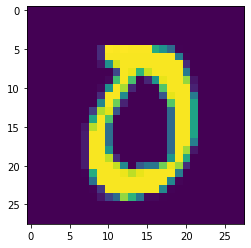

In [20]:
## now to check that is our answer is true or not 
plt.imshow(X_testb[28])

# **Input our own handwritten images to predict** 

In [21]:
import cv2

In [22]:
# /** 
#    now for each ane every image we need to pre process it like resize ,normalize and adding additional dimention for keras operations etc
#    so we will write a function tom excicute these all pre processing tsks
# **/

def Input_preprocessing(img):
      gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) ## converting colored image to gray
      RESIZED = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA) ## resizing the image into 28*28
      NEWIMG = tf.keras.utils.normalize (RESIZED , axis = 1) ##normailization operation
      NEWIMG  = np.array(NEWIMG).reshape(-1,28,28,1) ## kernal operation of convolutional layer
      return NEWIMG 

(672, 579, 3)

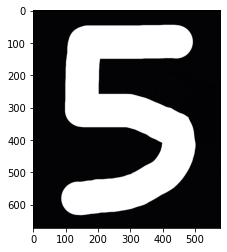

In [24]:
## lets try with a new image
img = cv2.imread('givenew.png')
plt.imshow(img)
img.shape

In [25]:
#img = Input_preprocessing(img)
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) ## converting colored image to gray
gray.shape

(672, 579)

In [26]:
RESIZED = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA) ## resizing the image into 28*28
RESIZED.shape

(28, 28)

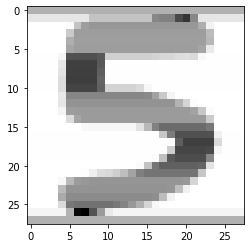

In [27]:
NEWIMG = tf.keras.utils.normalize (RESIZED , axis = 1) ##normailization operationp
plt.imshow(NEWIMG , cmap='binary')


In [ ]:
## but in our model we need background white and foreground black
#invert=255-NEWIMG
#plt.imshow(invert , cmap='binary')

In [28]:
NEWIMG  = np.array(NEWIMG).reshape(-1,28,28,1) ## kernal operation of convolutional layer

In [29]:
predictions= model.predict(NEWIMG)
print (np.argmax(predictions))

5


# **### letrs try same image with less thickness**




(327, 278, 3)

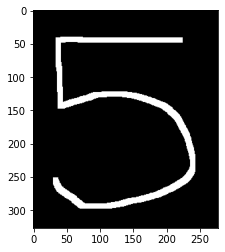

In [30]:
## lets try with a new image
img = cv2.imread('five.png')
plt.imshow(img)
img.shape

In [31]:
#img = Input_preprocessing(img)
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) ## converting colored image to gray
gray.shape

(327, 278)

In [32]:
RESIZED = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA) ## resizing the image into 28*28
RESIZED.shape

(28, 28)

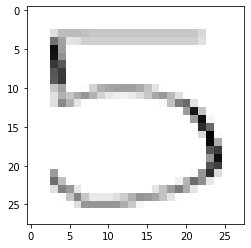

In [33]:
NEWIMG = tf.keras.utils.normalize (RESIZED , axis = 1) ##normailization operationp
plt.imshow(NEWIMG , cmap='binary')

In [34]:
## but in our model we need background white and foreground black
#invert=255-NEWIMG
#plt.imshow(invert , cmap='binary')

In [35]:
NEWIMG  = np.array(NEWIMG).reshape(-1,28,28,1) ## kernal operation of convolutional layer

let ue observe the output herethat the algorithm predicted the wrong class .

In [36]:
predictions= model.predict(NEWIMG)
print (np.argmax(predictions))

7


1) To summarize, the MINST data set contains photos with thick text,   which is insufficient for estimating numbers written with ordinary pens in the actual world.

2) To make the model more robust, we may also say that the MINST data set should be supplemented with letters of varying thickness.